# Project 2: Ames Housing Data and Kaggle Challenge

## Executive Summary

I am  tasked with creating a regression model based on the Ames Housing Dataset. This model will predict the price of a house at sale.

## Content:

- [Import libraries](#import_libraries)
- [EDA & Data Cleaning](#EDA)
- [Creating Dummies](#Dummies)
- [Remove Outliers](#Outliers)
- [Features Engineering](#Features)
- [Correlation](#Correlation)
- [Modelling](#Modelling)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

# Import libraries

 <a id="import_libraries"></a>

In [1]:
#import libraries
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV

 <a id="EDA"></a>

# EDA & Data cleaning

- Read the data dictionary.
- Determine _what_ missing values mean.
- Figure out what each categorical value represents.
- Identify outliers.
- Consider whether discrete values are better represented as categorical or continuous. (Are relationships to the target linear?)
- Decide how to impute null values.
- Decide how to handle outliers.
- Do you want to combine any features?
- Do you want to have interaction terms?
- Do you want to manually drop collinear features?

In [2]:
#import data
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

In [3]:
#examine data
train.shape

(2051, 81)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Frontage       719 non-null float64
Lot Area           879 non-null int64
Street             879 non-null object
Alley              58 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof M

In [6]:
def change_label (data):
    data.columns = data.columns.str.strip().str.lower().str.replace(" ", "_")

In [7]:
change_label (train)

In [8]:
change_label (test)

In [9]:
train.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


<strong> Remark: </strong> We changed the labels for ease for programming at later part.

In [10]:
test.shape 

(879, 80)

<strong> Remark: </strong>  Test data do not have "sales price" - which is need to be predicted, hence it is fine. 

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
id                 879 non-null int64
pid                879 non-null int64
ms_subclass        879 non-null int64
ms_zoning          879 non-null object
lot_frontage       719 non-null float64
lot_area           879 non-null int64
street             879 non-null object
alley              58 non-null object
lot_shape          879 non-null object
land_contour       879 non-null object
utilities          879 non-null object
lot_config         879 non-null object
land_slope         879 non-null object
neighborhood       879 non-null object
condition_1        879 non-null object
condition_2        879 non-null object
bldg_type          879 non-null object
house_style        879 non-null object
overall_qual       879 non-null int64
overall_cond       879 non-null int64
year_built         879 non-null int64
year_remod/add     879 non-null int64
roof_style         879 non-null object
roof_m

In [12]:
test.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold
count,879.000000,8.790000e+02,879.000000,719.000000,879.000000,879.000000,879.000000,879.000000,879.000000,878.000000,...,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,1445.588168,7.165050e+08,58.270762,69.630042,10340.920364,6.054608,5.565415,1970.533561,1984.444824,106.982916,...,470.832765,93.560865,47.478953,24.037543,2.594994,14.813424,1.882821,48.443686,6.207053,2007.824801
std,850.717105,1.889135e+08,42.211389,23.625372,10047.335167,1.374756,1.128422,30.403527,20.454546,188.356829,...,213.070155,121.174306,69.209179,73.212237,24.948416,52.975963,29.899698,549.858353,2.644097,1.327396
min,2.000000,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.500000,5.284861e+08,20.000000,59.000000,7298.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,...,323.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1435.000000,5.354542e+08,50.000000,68.000000,9453.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,...,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.000000,9.071921e+08,70.000000,80.000000,11606.500000,7.000000,6.000000,2000.000000,2003.000000,173.500000,...,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,...,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


In [13]:
#refer to data dictionary to decide how to replace the null. 
def check_cleaned(data):
    var_not_cleaned = 0
    var_cleaned =0
    for i in range(len(data.columns)):
        if data.iloc[:,i].count() <len(data.index):
            print ("NOT CLEANED: column: {} ,count: {}, dytype: {}" .format(data.columns[i],data.iloc[:,i].count(),data[data.columns[i]].dtype))
        if data.iloc[:,i].count() <len(data.index):
            var_not_cleaned += 1
        else: var_cleaned +=1
    if var_cleaned ==len(data.columns):
        print ("DATA CLEANED")

<strong> Remark: </strong> We created a function to identify variables (i.e. those with nulls/wrong data type) that require data cleaning.
We also review the data dictionary to decide on how to clean the data.

In [14]:
check_cleaned(train)
check_cleaned(test)

NOT CLEANED: column: lot_frontage ,count: 1721, dytype: float64
NOT CLEANED: column: alley ,count: 140, dytype: object
NOT CLEANED: column: mas_vnr_type ,count: 2029, dytype: object
NOT CLEANED: column: mas_vnr_area ,count: 2029, dytype: float64
NOT CLEANED: column: bsmt_qual ,count: 1996, dytype: object
NOT CLEANED: column: bsmt_cond ,count: 1996, dytype: object
NOT CLEANED: column: bsmt_exposure ,count: 1993, dytype: object
NOT CLEANED: column: bsmtfin_type_1 ,count: 1996, dytype: object
NOT CLEANED: column: bsmtfin_sf_1 ,count: 2050, dytype: float64
NOT CLEANED: column: bsmtfin_type_2 ,count: 1995, dytype: object
NOT CLEANED: column: bsmtfin_sf_2 ,count: 2050, dytype: float64
NOT CLEANED: column: bsmt_unf_sf ,count: 2050, dytype: float64
NOT CLEANED: column: total_bsmt_sf ,count: 2050, dytype: float64
NOT CLEANED: column: bsmt_full_bath ,count: 2049, dytype: float64
NOT CLEANED: column: bsmt_half_bath ,count: 2049, dytype: float64
NOT CLEANED: column: fireplace_qu ,count: 1051, dyty

<strong> Remark: </strong> For objects, we decided to replace all null value to "None" - assuming the feature is not available if there is no data for it. 

In [15]:
def clean_objects(data):
    for i in range(len(data.columns)):
        if data.iloc[:,i].dtype == "object":
            if data.iloc[:,i].count() <len(data.index):
                data[train.columns[i]]= pd.DataFrame(data.loc[:, data.columns[i]].fillna("None"))
            else: pass
        else: pass

In [16]:
clean_objects (train)
clean_objects (test)

<strong> Remark: </strong> We then created a function to identify all int/floats that have null values.

In [17]:
for i in range(len(train.columns)):
    if train.iloc[:,i].count() <len(train.index):
        print ("column: {} ,count: {}, dytype: {}" .format(train.columns[i],train.iloc[:,i].count(),train[train.columns[i]].dtype,train[train.columns[i]]))

column: lot_frontage ,count: 1721, dytype: float64
column: mas_vnr_area ,count: 2029, dytype: float64
column: bsmtfin_sf_1 ,count: 2050, dytype: float64
column: bsmtfin_sf_2 ,count: 2050, dytype: float64
column: bsmt_unf_sf ,count: 2050, dytype: float64
column: total_bsmt_sf ,count: 2050, dytype: float64
column: bsmt_full_bath ,count: 2049, dytype: float64
column: bsmt_half_bath ,count: 2049, dytype: float64
column: garage_yr_blt ,count: 1937, dytype: float64
column: garage_cars ,count: 2050, dytype: float64
column: garage_area ,count: 2050, dytype: float64


In [18]:
for i in range(len(test.columns)):
    if test.iloc[:,i].count() <len(test.index):
        print ("column: {} ,count: {}, dytype: {}" .format(test.columns[i],test.iloc[:,i].count(),test[test.columns[i]].dtype,test[test.columns[i]]))

column: lot_frontage ,count: 719, dytype: float64
column: mas_vnr_area ,count: 878, dytype: float64
column: garage_yr_blt ,count: 834, dytype: float64


<strong> Remark: </strong> For continous variables, we replace null with means so that we do not have to drop these data. For discrete variables - for years, we replace it with mode, while others we replace it with true zero with the assumption that feature is not available (hence null value).

<strong>Cleaning Notes</strong>

<strong>Continous variables - replace with mean</strong>
<br>column: Lot Frontage ,count: 1721, dytype: float64</br>
<br>column: Mas Vnr Area ,count: 2029, dytype: float64</br>
<br>column: BsmtFin SF 1 ,count: 2050, dytype: float64</br>
<br>column: BsmtFin SF 2 ,count: 2050, dytype: float64</br>
<br>column: Bsmt Unf SF ,count: 2050, dytype: float64</br>
<br>column: Total Bsmt SF ,count: 2050, dytype: float64</br>
<br>column: Garage Area ,count: 2050, dytype: float64</br>

<strong>Discrete variables - replace with mode</strong>
<br>column: Garage Yr Blt ,count: 1937, dytype: float64</br>

<strong>Discrete variables - replace with "0"</strong>
<br>column: Garage Cars ,count: 2050, dytype: float64</br>
<br>column: Bsmt Full Bath ,count: 2049, dytype: float64</br>
<br>column: Bsmt Half Bath ,count: 2049, dytype: float64</br>

In [19]:
#find float64 variables that have less than total counts and replace null value to mean of column
def clean_continous_var(data):
    colchangetomean = ["lot_frontage","mas_vnr_area", "bsmtfin_sf_1", "bsmtfin_sf_2","bsmt_unf_sf","total_bsmt_sf","garage_area"]
    for i in range(len(data.columns)):
        for y in range(len(colchangetomean)):
            if data.columns[i] == colchangetomean[y]:
                data[data.columns[i]]= pd.DataFrame(data.loc[:, data.columns[i]].fillna(np.nanmean(data[data.columns[i]])))
            else: pass

In [20]:
clean_continous_var (train)
clean_continous_var (test)

In [21]:
#find float64 variables that have less than total counts and replace null value to mode of column
def clean_discrete_var_mode(data):
    colchangetomode = ["garage_yr_blt"]
    for i in range(len(data.columns)):
        for y in range(len(colchangetomode)):
            if data.columns[i] == colchangetomode[y]:
                data[data.columns[i]]= pd.DataFrame(data.loc[:, data.columns[i]].fillna(data[data.columns[i]].mode().iloc[0]))
            else: pass

In [22]:
clean_discrete_var_mode (train)
clean_discrete_var_mode (test)

In [23]:
#find float64 variables that have less than total counts and replace null value to zero 
def clean_discrete_var_zero(data):
    colchangetozero = ["bsmt_full_bath","bsmt_half_bath", "garage_cars"]
    for i in range(len(data.columns)):
        for y in range(len(colchangetozero)):
            if data.columns[i] == colchangetozero[y]:
                data[data.columns[i]]= pd.DataFrame(data.loc[:, data.columns[i]].fillna(0))
            else: pass

In [24]:
clean_discrete_var_zero(train)
clean_discrete_var_zero(test)

<strong> Remark </strong>: We did a check to make sure that all null values are being taken care of. 

In [25]:
#check if all variables are cleaned (i.e. remove null values)
check_cleaned(train)
check_cleaned(test)

DATA CLEANED
DATA CLEANED


In [26]:
train.info

<bound method DataFrame.info of         id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0      109  533352170           60        RL       69.0552     13517   Pave   
1      544  531379050           60        RL       43.0000     11492   Pave   
2      153  535304180           20        RL       68.0000      7922   Pave   
3      318  916386060           60        RL       73.0000      9802   Pave   
4      255  906425045           50        RL       82.0000     14235   Pave   
5      138  535126040           20        RL      137.0000     16492   Pave   
6     2827  908186070          180        RM       35.0000      3675   Pave   
7      145  535154050           20        RL       69.0552     12160   Pave   
8     1942  535353130           20        RL       69.0552     15783   Pave   
9     1956  535426130           60        RL       70.0000     11606   Pave   
10    1044  527451290          160        RM       21.0000      1680   Pave   
11    2752  90638015

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
id                 879 non-null int64
pid                879 non-null int64
ms_subclass        879 non-null int64
ms_zoning          879 non-null object
lot_frontage       879 non-null float64
lot_area           879 non-null int64
street             879 non-null object
alley              879 non-null object
lot_shape          879 non-null object
land_contour       879 non-null object
utilities          879 non-null object
lot_config         879 non-null object
land_slope         879 non-null object
neighborhood       879 non-null object
condition_1        879 non-null object
condition_2        879 non-null object
bldg_type          879 non-null object
house_style        879 non-null object
overall_qual       879 non-null int64
overall_cond       879 non-null int64
year_built         879 non-null int64
year_remod/add     879 non-null int64
roof_style         879 non-null object
roof_

## EDA
- to check if there is any other variables that require cleaning
- brainstorm on feature engineering 

In [28]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(20,80)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
    for y in list_of_titles:
        plt.title(y)
        # Set titles, labels, etc here for each subplot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B82C1A4D68>,
      dtype=object)

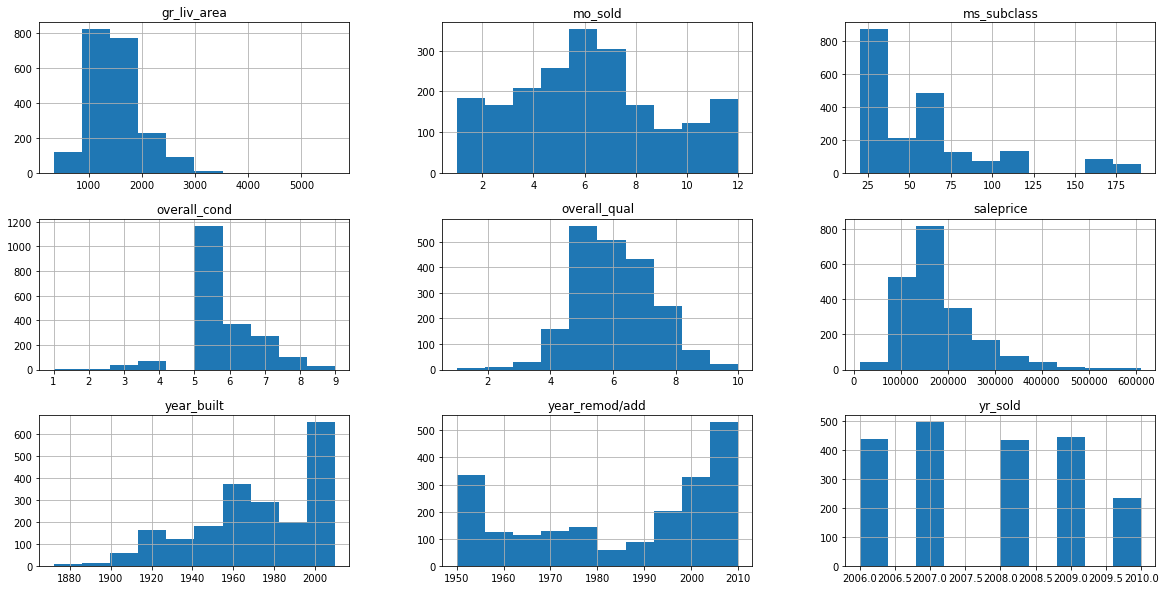

In [29]:
train[["saleprice","year_built","year_remod/add","yr_sold","mo_sold","overall_qual","overall_cond","gr_liv_area","ms_subclass"]].hist(figsize=(20,10), sharex=False, sharey=False)

<strong>Remark:</strong> 
<br>Overall condition/quality is positively skewed with minimum number of outliers.</br>
<br>Salesprice distribution is positively skewed to the right with a number of outliers.</br>
<br>Oldest house built in ~1880s. Newest house built in ~2010.</br>
<br>Yr sold between 2006 and 2010, with relative lower no. of houses sold in 2010</br>
<br>No. of houses sold peak in June/July.</br>
<br>Most house size is between 1000 to ~1800 sq feet</br>

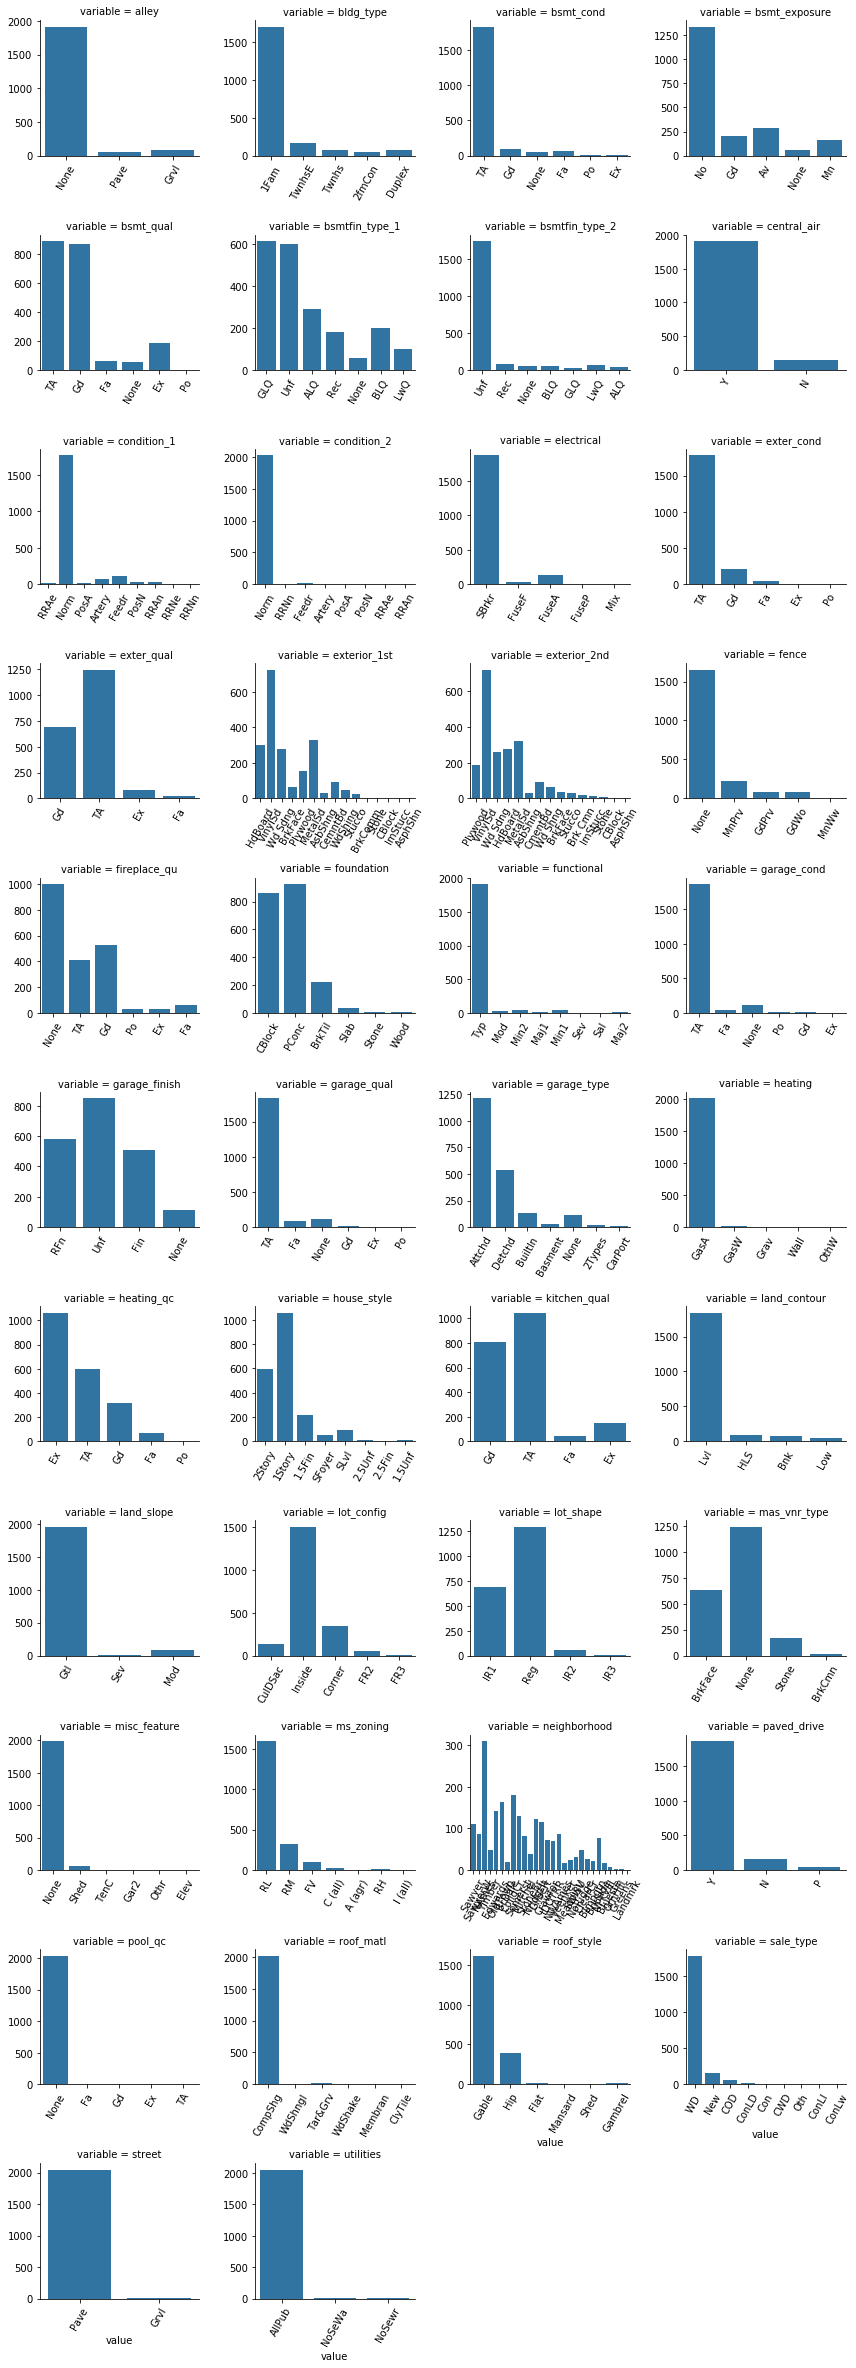

In [30]:
# Count plots of categorical features
cat_features = train.select_dtypes(include=['object']).columns
f = pd.melt(train, value_vars=sorted(cat_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value', order=None)
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

<strong>Remark:</strong>
Note that a number of variables are skewed towards one value. We will not include these variables for regression analysis. However we will need to take note of this situation when performing analysis. 

Categorical variables to transform for regression analysis: variables with scales (i.e. excellent, good. etc), neighbourhood, bsmtfin_type_1, exterior_1st, exterior_2nd, foundation, garage_finish, garage_type, house_style, lot_shape, mas_vnr_type.

 <a id="Dummies"></a>

## Creating dummies for identified categorical data

In [31]:
#create dummies for train and test data
train = pd.get_dummies(train,columns=["mas_vnr_type","ms_subclass","bsmt_qual","bsmt_cond","exter_qual","exter_cond","heating_qc","kitchen_qual","fireplace_qu","garage_qual","garage_cond","pool_qc","neighborhood", "bsmtfin_type_1", "exterior_1st", "exterior_2nd", "foundation", "garage_finish", "garage_type", "house_style", "lot_shape"])
test = pd.get_dummies(test,columns=["mas_vnr_type","ms_subclass","bsmt_qual","bsmt_cond","exter_qual","exter_cond","heating_qc","kitchen_qual","fireplace_qu","garage_qual","garage_cond","pool_qc","neighborhood", "bsmtfin_type_1", "exterior_1st", "exterior_2nd", "foundation", "garage_finish", "garage_type", "house_style", "lot_shape"])

In [32]:
#check for dummies variables created
dummiesvar = ("mas_vnr_type","ms_subclass","bsmt_qual","bsmt_cond","exter_qual","exter_cond","heating_qc","kitchen_qual","fireplace_qu","garage_qual","garage_cond","pool_qc","neighborhood", "bsmtfin_type_1", "exterior_1st", "exterior_2nd", "foundation", "garage_finish", "garage_type", "house_style", "lot_shape")

def check_dumb (data):
    for i in dummiesvar:
        check_cols = ()
        check_cols = [col for col in data.columns if i in col]
        print ("{},".format(tuple(check_cols)))

In [33]:
check_dumb (train)

('mas_vnr_type_BrkCmn', 'mas_vnr_type_BrkFace', 'mas_vnr_type_None', 'mas_vnr_type_Stone'),
('ms_subclass_20', 'ms_subclass_30', 'ms_subclass_40', 'ms_subclass_45', 'ms_subclass_50', 'ms_subclass_60', 'ms_subclass_70', 'ms_subclass_75', 'ms_subclass_80', 'ms_subclass_85', 'ms_subclass_90', 'ms_subclass_120', 'ms_subclass_150', 'ms_subclass_160', 'ms_subclass_180', 'ms_subclass_190'),
('bsmt_qual_Ex', 'bsmt_qual_Fa', 'bsmt_qual_Gd', 'bsmt_qual_None', 'bsmt_qual_Po', 'bsmt_qual_TA'),
('bsmt_cond_Ex', 'bsmt_cond_Fa', 'bsmt_cond_Gd', 'bsmt_cond_None', 'bsmt_cond_Po', 'bsmt_cond_TA'),
('exter_qual_Ex', 'exter_qual_Fa', 'exter_qual_Gd', 'exter_qual_TA'),
('exter_cond_Ex', 'exter_cond_Fa', 'exter_cond_Gd', 'exter_cond_Po', 'exter_cond_TA'),
('heating_qc_Ex', 'heating_qc_Fa', 'heating_qc_Gd', 'heating_qc_Po', 'heating_qc_TA'),
('kitchen_qual_Ex', 'kitchen_qual_Fa', 'kitchen_qual_Gd', 'kitchen_qual_TA'),
('fireplace_qu_Ex', 'fireplace_qu_Fa', 'fireplace_qu_Gd', 'fireplace_qu_None', 'fireplace_q

In [34]:
#input dummies created below

dumb_train_var = [('mas_vnr_type_BrkCmn', 'mas_vnr_type_BrkFace', 'mas_vnr_type_None', 'mas_vnr_type_Stone'),('ms_subclass_20', 'ms_subclass_30', 'ms_subclass_40', 'ms_subclass_45', 'ms_subclass_50', 'ms_subclass_60', 'ms_subclass_70', 'ms_subclass_75', 'ms_subclass_80', 'ms_subclass_85', 'ms_subclass_90', 'ms_subclass_120', 'ms_subclass_150', 'ms_subclass_160', 'ms_subclass_180', 'ms_subclass_190'),('bsmt_qual_Ex', 'bsmt_qual_Fa', 'bsmt_qual_Gd', 'bsmt_qual_None', 'bsmt_qual_Po', 'bsmt_qual_TA'),
('bsmt_cond_Ex', 'bsmt_cond_Fa', 'bsmt_cond_Gd', 'bsmt_cond_None', 'bsmt_cond_Po', 'bsmt_cond_TA'),
('exter_qual_Ex', 'exter_qual_Fa', 'exter_qual_Gd', 'exter_qual_TA'),
('exter_cond_Ex', 'exter_cond_Fa', 'exter_cond_Gd', 'exter_cond_Po', 'exter_cond_TA'),
('heating_qc_Ex', 'heating_qc_Fa', 'heating_qc_Gd', 'heating_qc_Po', 'heating_qc_TA'),
('kitchen_qual_Ex', 'kitchen_qual_Fa', 'kitchen_qual_Gd', 'kitchen_qual_TA'),
('fireplace_qu_Ex', 'fireplace_qu_Fa', 'fireplace_qu_Gd', 'fireplace_qu_None', 'fireplace_qu_Po', 'fireplace_qu_TA'),
('garage_qual_Ex', 'garage_qual_Fa', 'garage_qual_Gd', 'garage_qual_None', 'garage_qual_Po', 'garage_qual_TA'),
('garage_cond_Ex', 'garage_cond_Fa', 'garage_cond_Gd', 'garage_cond_None', 'garage_cond_Po', 'garage_cond_TA'),
('pool_qc_Ex', 'pool_qc_Fa', 'pool_qc_Gd', 'pool_qc_None', 'pool_qc_TA'),
('neighborhood_Blmngtn', 'neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide', 'neighborhood_ClearCr', 'neighborhood_CollgCr', 'neighborhood_Crawfor', 'neighborhood_Edwards', 'neighborhood_Gilbert', 'neighborhood_Greens', 'neighborhood_GrnHill', 'neighborhood_IDOTRR', 'neighborhood_Landmrk', 'neighborhood_MeadowV', 'neighborhood_Mitchel', 'neighborhood_NAmes', 'neighborhood_NPkVill', 'neighborhood_NWAmes', 'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_OldTown', 'neighborhood_SWISU', 'neighborhood_Sawyer', 'neighborhood_SawyerW', 'neighborhood_Somerst', 'neighborhood_StoneBr', 'neighborhood_Timber', 'neighborhood_Veenker'),
('bsmtfin_type_1_ALQ', 'bsmtfin_type_1_BLQ', 'bsmtfin_type_1_GLQ', 'bsmtfin_type_1_LwQ', 'bsmtfin_type_1_None', 'bsmtfin_type_1_Rec', 'bsmtfin_type_1_Unf'),
('exterior_1st_AsbShng', 'exterior_1st_AsphShn', 'exterior_1st_BrkComm', 'exterior_1st_BrkFace', 'exterior_1st_CBlock', 'exterior_1st_CemntBd', 'exterior_1st_HdBoard', 'exterior_1st_ImStucc', 'exterior_1st_MetalSd', 'exterior_1st_Plywood', 'exterior_1st_Stone', 'exterior_1st_Stucco', 'exterior_1st_VinylSd', 'exterior_1st_Wd Sdng', 'exterior_1st_WdShing'),
('exterior_2nd_AsbShng', 'exterior_2nd_AsphShn', 'exterior_2nd_Brk Cmn', 'exterior_2nd_BrkFace', 'exterior_2nd_CBlock', 'exterior_2nd_CmentBd', 'exterior_2nd_HdBoard', 'exterior_2nd_ImStucc', 'exterior_2nd_MetalSd', 'exterior_2nd_Plywood', 'exterior_2nd_Stone', 'exterior_2nd_Stucco', 'exterior_2nd_VinylSd', 'exterior_2nd_Wd Sdng', 'exterior_2nd_Wd Shng'),
('foundation_BrkTil', 'foundation_CBlock', 'foundation_PConc', 'foundation_Slab', 'foundation_Stone', 'foundation_Wood'),
('garage_finish_Fin', 'garage_finish_None', 'garage_finish_RFn', 'garage_finish_Unf'),
('garage_type_2Types', 'garage_type_Attchd', 'garage_type_Basment', 'garage_type_BuiltIn', 'garage_type_CarPort', 'garage_type_Detchd', 'garage_type_None'),
('house_style_1.5Fin', 'house_style_1.5Unf', 'house_style_1Story', 'house_style_2.5Fin', 'house_style_2.5Unf', 'house_style_2Story', 'house_style_SFoyer', 'house_style_SLvl'),
('lot_shape_IR1', 'lot_shape_IR2', 'lot_shape_IR3', 'lot_shape_Reg')]

In [35]:
check_dumb (test)

('mas_vnr_type_BrkCmn', 'mas_vnr_type_BrkFace', 'mas_vnr_type_CBlock', 'mas_vnr_type_None', 'mas_vnr_type_Stone'),
('ms_subclass_20', 'ms_subclass_30', 'ms_subclass_40', 'ms_subclass_45', 'ms_subclass_50', 'ms_subclass_60', 'ms_subclass_70', 'ms_subclass_75', 'ms_subclass_80', 'ms_subclass_85', 'ms_subclass_90', 'ms_subclass_120', 'ms_subclass_160', 'ms_subclass_180', 'ms_subclass_190'),
('bsmt_qual_Ex', 'bsmt_qual_Fa', 'bsmt_qual_Gd', 'bsmt_qual_None', 'bsmt_qual_Po', 'bsmt_qual_TA'),
('bsmt_cond_Fa', 'bsmt_cond_Gd', 'bsmt_cond_None', 'bsmt_cond_TA'),
('exter_qual_Ex', 'exter_qual_Fa', 'exter_qual_Gd', 'exter_qual_TA'),
('exter_cond_Ex', 'exter_cond_Fa', 'exter_cond_Gd', 'exter_cond_Po', 'exter_cond_TA'),
('heating_qc_Ex', 'heating_qc_Fa', 'heating_qc_Gd', 'heating_qc_TA'),
('kitchen_qual_Ex', 'kitchen_qual_Fa', 'kitchen_qual_Gd', 'kitchen_qual_Po', 'kitchen_qual_TA'),
('fireplace_qu_Ex', 'fireplace_qu_Fa', 'fireplace_qu_Gd', 'fireplace_qu_None', 'fireplace_qu_Po', 'fireplace_qu_TA'),

In [36]:
#input dummies created below

dumb_test_var = [('mas_vnr_type_BrkCmn', 'mas_vnr_type_BrkFace', 'mas_vnr_type_None', 'mas_vnr_type_Stone'),('ms_subclass_20', 'ms_subclass_30', 'ms_subclass_40', 'ms_subclass_45', 'ms_subclass_50', 'ms_subclass_60', 'ms_subclass_70', 'ms_subclass_75', 'ms_subclass_80', 'ms_subclass_85', 'ms_subclass_90', 'ms_subclass_120', 'ms_subclass_160', 'ms_subclass_180', 'ms_subclass_190'),('bsmt_qual_Ex', 'bsmt_qual_Fa', 'bsmt_qual_Gd', 'bsmt_qual_None', 'bsmt_qual_Po', 'bsmt_qual_TA'),
('bsmt_cond_Fa', 'bsmt_cond_Gd', 'bsmt_cond_None', 'bsmt_cond_TA'),
('exter_qual_Ex', 'exter_qual_Fa', 'exter_qual_Gd', 'exter_qual_TA'),
('exter_cond_Ex', 'exter_cond_Fa', 'exter_cond_Gd', 'exter_cond_Po', 'exter_cond_TA'),
('heating_qc_Ex', 'heating_qc_Fa', 'heating_qc_Gd', 'heating_qc_TA'),
('kitchen_qual_Ex', 'kitchen_qual_Fa', 'kitchen_qual_Gd', 'kitchen_qual_Po', 'kitchen_qual_TA'),
('fireplace_qu_Ex', 'fireplace_qu_Fa', 'fireplace_qu_Gd', 'fireplace_qu_None', 'fireplace_qu_Po', 'fireplace_qu_TA'),
('garage_qual_Fa', 'garage_qual_Gd', 'garage_qual_None', 'garage_qual_Po', 'garage_qual_TA'),
('garage_cond_Ex', 'garage_cond_Fa', 'garage_cond_Gd', 'garage_cond_None', 'garage_cond_Po', 'garage_cond_TA'),
('pool_qc_Ex', 'pool_qc_None', 'pool_qc_TA'),
('neighborhood_Blmngtn', 'neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide', 'neighborhood_ClearCr', 'neighborhood_CollgCr', 'neighborhood_Crawfor', 'neighborhood_Edwards', 'neighborhood_Gilbert', 'neighborhood_Greens', 'neighborhood_IDOTRR', 'neighborhood_MeadowV', 'neighborhood_Mitchel', 'neighborhood_NAmes', 'neighborhood_NPkVill', 'neighborhood_NWAmes', 'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_OldTown', 'neighborhood_SWISU', 'neighborhood_Sawyer', 'neighborhood_SawyerW', 'neighborhood_Somerst', 'neighborhood_StoneBr', 'neighborhood_Timber', 'neighborhood_Veenker'),
('bsmtfin_type_1_ALQ', 'bsmtfin_type_1_BLQ', 'bsmtfin_type_1_GLQ', 'bsmtfin_type_1_LwQ', 'bsmtfin_type_1_None', 'bsmtfin_type_1_Rec', 'bsmtfin_type_1_Unf'),
('exterior_1st_AsbShng', 'exterior_1st_AsphShn', 'exterior_1st_BrkComm', 'exterior_1st_BrkFace', 'exterior_1st_CemntBd', 'exterior_1st_HdBoard', 'exterior_1st_MetalSd', 'exterior_1st_Plywood', 'exterior_1st_PreCast', 'exterior_1st_Stucco', 'exterior_1st_VinylSd', 'exterior_1st_Wd Sdng', 'exterior_1st_WdShing'),
('exterior_2nd_AsbShng', 'exterior_2nd_AsphShn', 'exterior_2nd_Brk Cmn', 'exterior_2nd_BrkFace', 'exterior_2nd_CBlock', 'exterior_2nd_CmentBd', 'exterior_2nd_HdBoard', 'exterior_2nd_ImStucc', 'exterior_2nd_MetalSd', 'exterior_2nd_Other', 'exterior_2nd_Plywood', 'exterior_2nd_PreCast', 'exterior_2nd_Stucco', 'exterior_2nd_VinylSd', 'exterior_2nd_Wd Sdng', 'exterior_2nd_Wd Shng'),
('foundation_BrkTil', 'foundation_CBlock', 'foundation_PConc', 'foundation_Slab', 'foundation_Stone', 'foundation_Wood'),
('garage_finish_Fin', 'garage_finish_None', 'garage_finish_RFn', 'garage_finish_Unf'),
('garage_type_2Types', 'garage_type_Attchd', 'garage_type_Basment', 'garage_type_BuiltIn', 'garage_type_CarPort', 'garage_type_Detchd', 'garage_type_None'),
('house_style_1.5Fin', 'house_style_1.5Unf', 'house_style_1Story', 'house_style_2.5Fin', 'house_style_2.5Unf', 'house_style_2Story', 'house_style_SFoyer', 'house_style_SLvl'),
('lot_shape_IR1', 'lot_shape_IR2', 'lot_shape_IR3', 'lot_shape_Reg')]

In [37]:
def to_dropdumb (var):
    for i in range(len(var)):
        to_drop=[]
        to_drop=var[i][len(var[i])-1]
        print ("'{}'," .format(to_drop))

In [38]:
to_dropdumb(dumb_train_var)

'mas_vnr_type_Stone',
'ms_subclass_190',
'bsmt_qual_TA',
'bsmt_cond_TA',
'exter_qual_TA',
'exter_cond_TA',
'heating_qc_TA',
'kitchen_qual_TA',
'fireplace_qu_TA',
'garage_qual_TA',
'garage_cond_TA',
'pool_qc_TA',
'neighborhood_Veenker',
'bsmtfin_type_1_Unf',
'exterior_1st_WdShing',
'exterior_2nd_Wd Shng',
'foundation_Wood',
'garage_finish_Unf',
'garage_type_None',
'house_style_SLvl',
'lot_shape_Reg',


In [39]:
#input variables to drop below
train = train.drop(columns=['mas_vnr_type_None','ms_subclass_190',
'bsmt_qual_TA',
'bsmt_cond_TA',
'exter_qual_TA',
'exter_cond_TA',
'heating_qc_TA',
'kitchen_qual_TA',
'fireplace_qu_TA',
'garage_qual_TA',
'garage_cond_TA',
'pool_qc_TA',
'neighborhood_Veenker',
'bsmtfin_type_1_Unf',
'exterior_1st_WdShing',
'exterior_2nd_Wd Shng',
'foundation_Wood',
'garage_finish_Unf',
'garage_type_None',
'house_style_SLvl',
'lot_shape_Reg'])

In [40]:
to_dropdumb(dumb_test_var)

'mas_vnr_type_Stone',
'ms_subclass_190',
'bsmt_qual_TA',
'bsmt_cond_TA',
'exter_qual_TA',
'exter_cond_TA',
'heating_qc_TA',
'kitchen_qual_TA',
'fireplace_qu_TA',
'garage_qual_TA',
'garage_cond_TA',
'pool_qc_TA',
'neighborhood_Veenker',
'bsmtfin_type_1_Unf',
'exterior_1st_WdShing',
'exterior_2nd_Wd Shng',
'foundation_Wood',
'garage_finish_Unf',
'garage_type_None',
'house_style_SLvl',
'lot_shape_Reg',


In [41]:
#input variables to drop below
test = test.drop(columns=['mas_vnr_type_None','ms_subclass_190','bsmt_qual_TA',
'bsmt_cond_TA',
'exter_qual_TA',
'exter_cond_TA',
'heating_qc_TA',
'kitchen_qual_TA',
'fireplace_qu_TA',
'garage_qual_TA',
'garage_cond_TA',
'pool_qc_TA',
'neighborhood_Veenker',
'bsmtfin_type_1_Unf',
'exterior_1st_WdShing',
'exterior_2nd_Wd Shng',
'foundation_Wood',
'garage_finish_Unf',
'garage_type_None',
'house_style_SLvl',
'lot_shape_Reg'])

 <a id="Outliers"></a>

## Remove Outliers

As per the special notes provided by the author:
There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations) before assigning it to students

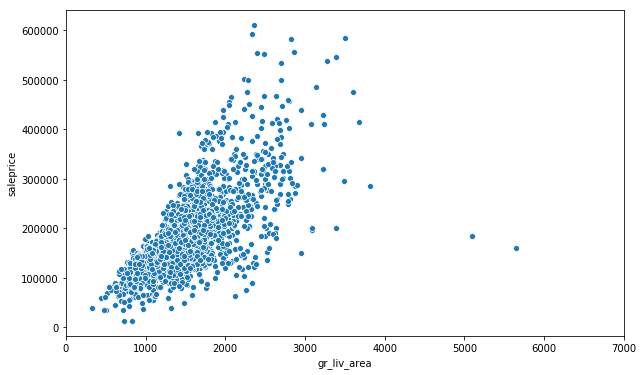

In [42]:
# Inspect the scatter plot of GrLivArea vs. SalePrice
#Plot figsize
fig, ax = plt.subplots(figsize=(10,6)) 
sns.scatterplot(train["gr_liv_area"], train["saleprice"])
ax.set_xlim(0, 7000)
plt.show()

In [43]:
# removed Gr Liv Area above 4000 (outliers)
train.drop(train[train["gr_liv_area"] >= 4000].index, inplace=True)

<strong> Remark: </strong>There are some other outliers as well. We will keep these outliers first to see if they affect the models in the later part. 

 <a id="Features"></a>

## Features Engineering

<strong> Remark: </strong> We review the data dictionary and engineered more features by themes.

In [44]:
#grouping discrete/continous variables with the same themes together.
def features_engineer_dis_con (data):
    data["basement_bath"] = data["bsmt_full_bath"]+data["bsmt_half_bath"] 
    data["total_bath"] = data["half_bath"] * data ["full_bath"]
    data["porch_sf"] = data["wood_deck_sf"] + data ["open_porch_sf"] + data ["enclosed_porch"] + data["3ssn_porch"] + data ["screen_porch"]
    data["rmsabovegrade"] = data["full_bath"] + data ["half_bath"] + data["bedroom_abvgr"] + data["kitchen_abvgr"] + data["totrms_abvgrd"]
    data["garage_size_percar"] = data ["garage_area"] / data["garage_cars"]

In [45]:
features_engineer_dis_con (train)

In [46]:
features_engineer_dis_con (test)

In [47]:
train["garage_size_percar"]= train["garage_size_percar"].replace(np.inf, 0)

In [48]:
test["garage_size_percar"]= test["garage_size_percar"].replace(np.inf, 0)

In [49]:
train["garage_size_percar"]= train["garage_size_percar"].replace(np.nan, 0)

In [50]:
test["garage_size_percar"]= test["garage_size_percar"].replace(np.nan, 0)

In [51]:
#create variables that sum up the no. of excellents (excluding overall condition and overall quality)
def features_engineer_excellent_train (data):
    data["num_excellent"] = data["bsmt_qual_Ex"] + data["bsmt_cond_Ex"] + data["exter_qual_Ex"]+data["exter_cond_Ex"]+data["heating_qc_Ex"]+data["kitchen_qual_Ex"]+data["fireplace_qu_Ex"]+data["garage_qual_Ex"]+data["garage_cond_Ex"]+data["pool_qc_Ex"]

In [52]:
def features_engineer_excellent_test (data):
    data["num_excellent"] = data["bsmt_qual_Ex"] +data["exter_qual_Ex"]+data["exter_cond_Ex"]+data["heating_qc_Ex"]+data["kitchen_qual_Ex"]+data["fireplace_qu_Ex"]++data["garage_cond_Ex"]+data["pool_qc_Ex"]

In [53]:
def features_engineer_ex_gd_train (data):
    data["num_ex_gd"] = data["bsmt_qual_Ex"] + data["bsmt_cond_Ex"] + data["bsmt_qual_Gd"] + data["bsmt_cond_Gd"] +data["exter_qual_Ex"]+data["exter_cond_Ex"]+data["heating_qc_Ex"]+data["kitchen_qual_Ex"]+data["fireplace_qu_Ex"]+data["garage_qual_Ex"]+data["garage_cond_Ex"]+data["pool_qc_Ex"]+ data["exter_qual_Gd"]+data["exter_cond_Gd"]+data["heating_qc_Gd"]+data["kitchen_qual_Gd"]+data["fireplace_qu_Gd"]+data["garage_qual_Gd"]+data["garage_cond_Gd"]+data["pool_qc_Gd"]

In [54]:
def features_engineer_ex_gd_test (data):
    data["num_ex_gd"] = data["bsmt_qual_Ex"] + data["bsmt_qual_Gd"] + data["bsmt_cond_Gd"]+data["exter_qual_Ex"]+data["exter_cond_Ex"]+data["heating_qc_Ex"]+data["kitchen_qual_Ex"]+data["fireplace_qu_Ex"]+data["garage_cond_Ex"]+data["pool_qc_Ex"]+ data["exter_qual_Gd"]+data["exter_cond_Gd"]+data["heating_qc_Gd"]+data["kitchen_qual_Gd"]+data["fireplace_qu_Gd"]+data["garage_cond_Gd"]+data["garage_qual_Gd"]

In [55]:
features_engineer_excellent_train(train)

In [56]:
features_engineer_excellent_test(test)

In [57]:
features_engineer_ex_gd_train (train)

In [58]:
features_engineer_ex_gd_test (test)

In [59]:
list(train.columns)

['id',
 'pid',
 'ms_zoning',
 'lot_frontage',
 'lot_area',
 'street',
 'alley',
 'land_contour',
 'utilities',
 'lot_config',
 'land_slope',
 'condition_1',
 'condition_2',
 'bldg_type',
 'overall_qual',
 'overall_cond',
 'year_built',
 'year_remod/add',
 'roof_style',
 'roof_matl',
 'mas_vnr_area',
 'bsmt_exposure',
 'bsmtfin_sf_1',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'heating',
 'central_air',
 'electrical',
 '1st_flr_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'gr_liv_area',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'totrms_abvgrd',
 'functional',
 'fireplaces',
 'garage_yr_blt',
 'garage_cars',
 'garage_area',
 'paved_drive',
 'wood_deck_sf',
 'open_porch_sf',
 'enclosed_porch',
 '3ssn_porch',
 'screen_porch',
 'pool_area',
 'fence',
 'misc_feature',
 'misc_val',
 'mo_sold',
 'yr_sold',
 'sale_type',
 'saleprice',
 'mas_vnr_type_BrkCmn',
 'mas_vnr_type_BrkFace',
 'mas_vnr_type_Stone',
 'ms_

In [60]:
list(test.columns)

['id',
 'pid',
 'ms_zoning',
 'lot_frontage',
 'lot_area',
 'street',
 'alley',
 'land_contour',
 'utilities',
 'lot_config',
 'land_slope',
 'condition_1',
 'condition_2',
 'bldg_type',
 'overall_qual',
 'overall_cond',
 'year_built',
 'year_remod/add',
 'roof_style',
 'roof_matl',
 'mas_vnr_area',
 'bsmt_exposure',
 'bsmtfin_sf_1',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'heating',
 'central_air',
 'electrical',
 '1st_flr_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'gr_liv_area',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'totrms_abvgrd',
 'functional',
 'fireplaces',
 'garage_yr_blt',
 'garage_cars',
 'garage_area',
 'paved_drive',
 'wood_deck_sf',
 'open_porch_sf',
 'enclosed_porch',
 '3ssn_porch',
 'screen_porch',
 'pool_area',
 'fence',
 'misc_feature',
 'misc_val',
 'mo_sold',
 'yr_sold',
 'sale_type',
 'mas_vnr_type_BrkCmn',
 'mas_vnr_type_BrkFace',
 'mas_vnr_type_CBlock',
 'mas_vnr_type_Sto

 <a id="Correlation"></a>

## Correlation  

- remove variables that are correlated (within predictors)

In [61]:
predictors_filtered = train[['lot_frontage','lot_area',
 # 'overall_qual',  # to remove - strongly correlate with multiple variables ###
 'overall_cond',
 #'year_built', # to remove - strongly correlate with overall qual  ###
 #'year_remod/add', # to remove - strongly correlate with overall qual  ###
 'mas_vnr_type_BrkCmn',
 #'mas_vnr_type_BrkFace', ######
 'mas_vnr_type_Stone',
 'mas_vnr_area',
 #'bsmtfin_sf_1',# to remove - strongly correlate with multiple variables   ###
 #'bsmtfin_sf_2', #to remove strongly correlate with bath  ###
 'bsmt_unf_sf',
 'total_bsmt_sf', 
 #'1st_flr_sf', # to remove- strongly correlate total bsmt square feet ####
 #'2nd_flr_sf',# to remove- strongly correlate total bsmt square feet ####
 'low_qual_fin_sf',
 #'gr_liv_area', # to remove- strongly correlate totalrm abv grade  ###
 'bsmt_full_bath',
 'bsmt_half_bath',
 #'full_bath', # to remove - strongly correlate with multiple variables ####
 'half_bath',
 #'bedroom_abvgr', # to remove- strongly correlate totalrm abv grade  ###
 ###'kitchen_abvgr',  ###
 'totrms_abvgrd', 
 'fireplaces',
 'garage_yr_blt',
 'garage_cars', 
 #'garage_area', # to remove- strongly correlate with garage car  ###
 'wood_deck_sf',
 'open_porch_sf',
 'enclosed_porch',
 '3ssn_porch',
 'screen_porch',
 'pool_area',
 'misc_val',
 'mo_sold',
 'yr_sold','neighborhood_Blmngtn',
 'neighborhood_Blueste',
 'neighborhood_BrDale',
 'neighborhood_BrkSide',
 'neighborhood_ClearCr',
 'neighborhood_CollgCr',
 'neighborhood_Crawfor',
 'neighborhood_Edwards',
 'neighborhood_Gilbert',
 'neighborhood_Greens',
 #'neighborhood_GrnHill',
 'neighborhood_IDOTRR',
 #'neighborhood_Landmrk',
 'neighborhood_MeadowV',
 'neighborhood_Mitchel',
 'neighborhood_NAmes',
 'neighborhood_NPkVill',
 'neighborhood_NWAmes',
 'neighborhood_NoRidge',
 'neighborhood_NridgHt',
 'neighborhood_OldTown',
 'neighborhood_SWISU',
 'neighborhood_Sawyer',
 'neighborhood_SawyerW',
 'neighborhood_Somerst',
 'neighborhood_StoneBr',
 'neighborhood_Timber','bsmtfin_type_1_ALQ',
 'bsmtfin_type_1_BLQ',
 'bsmtfin_type_1_GLQ',
 'bsmtfin_type_1_LwQ',
 'bsmtfin_type_1_Rec',
 #'exterior_1st_AsbShng',
 #'exterior_1st_AsphShn',
 'exterior_1st_BrkComm',
 #'exterior_1st_BrkFace',
 #'exterior_1st_CBlock',
 #'exterior_1st_CemntBd',
 #'exterior_1st_HdBoard',
 #'exterior_1st_ImStucc',
 #'exterior_1st_MetalSd',
 #'exterior_1st_Plywood',
 #'exterior_1st_Stone',
 #'exterior_1st_Stucco',
 #'exterior_1st_VinylSd',
 #'exterior_1st_Wd Sdng',
 'exterior_2nd_AsbShng',
 'exterior_2nd_AsphShn',
 #'exterior_2nd_Brk Cmn',
 'exterior_2nd_BrkFace',
 'exterior_2nd_CBlock',
 'exterior_2nd_CmentBd',
 'exterior_2nd_HdBoard',
 'exterior_2nd_ImStucc',
 'exterior_2nd_MetalSd',
 'exterior_2nd_Plywood',
 #'exterior_2nd_Stone',
 'exterior_2nd_Stucco',
 'exterior_2nd_VinylSd',
 'exterior_2nd_Wd Sdng','foundation_BrkTil',
 'foundation_CBlock',
# 'foundation_PConc',######
 'foundation_Slab',
 'foundation_Stone',
 'garage_finish_Fin',
 'garage_finish_None',
 'garage_finish_RFn',
 'garage_type_2Types',
 #'garage_type_Attchd', ####
 'garage_type_Basment',
 'garage_type_BuiltIn',
 'garage_type_CarPort',
 'garage_type_Detchd',
 #'house_style_1.5Fin', ######
 #'house_style_1.5Unf', ######
 #'house_style_1Story', ######
 #'house_style_2.5Fin', ######
 #'house_style_2.5Unf',######
 #'house_style_2Story',######
 #'house_style_SFoyer',######
 'lot_shape_IR1',
 'lot_shape_IR2',
 'lot_shape_IR3',
 #'basement_bath', ####
 #'total_bath',  ###
 'garage_size_percar',
 #'porch_sf',  ###
 #'rmsabovegrade', ####
 #'num_excellent', ####
 'num_ex_gd',
 'ms_subclass_20',
 'ms_subclass_30',
 'ms_subclass_40',
 'ms_subclass_45',
 'ms_subclass_50',
 'ms_subclass_60',
 'ms_subclass_70',
 'ms_subclass_75',
 'ms_subclass_80',
 'ms_subclass_85',
 'ms_subclass_90',
 'ms_subclass_120',
# 'ms_subclass_150', ######
 'ms_subclass_160',
 'ms_subclass_180',"bsmt_qual_Ex","exter_qual_Ex","exter_cond_Ex","heating_qc_Ex","kitchen_qual_Ex","fireplace_qu_Ex","garage_cond_Ex"]]


In [62]:
predictors_all = train[['lot_frontage',
 'lot_area',
 'overall_qual',  # to remove - strongly correlate with multiple variables
 'overall_cond',
 'year_built', # to remove - strongly correlate with overall qual
 'year_remod/add', # to remove - strongly correlate with overall qual
 'mas_vnr_type_BrkCmn',
 'mas_vnr_type_BrkFace',
 'mas_vnr_type_Stone',
 'mas_vnr_area',
 'bsmtfin_sf_1',# to remove - strongly correlate with multiple variables
 'bsmtfin_sf_2', #to remove strongly correlate with bath
 ###'bsmt_unf_sf',
 'total_bsmt_sf', 
 '1st_flr_sf', # to remove- strongly correlate total bsmt square feet
 '2nd_flr_sf',# to remove- strongly correlate total bsmt square feet
 'low_qual_fin_sf',
 'gr_liv_area', # to remove- strongly correlate totalrm abv grade
 ###'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath', # to remove - strongly correlate with multiple variables
 'half_bath',
 'bedroom_abvgr', # to remove- strongly correlate totalrm abv grade
 'kitchen_abvgr',
 'totrms_abvgrd', 
 'fireplaces',
 'garage_yr_blt',
 'garage_cars', 
 'garage_area', # to remove- strongly correlate with garage car
 ###'wood_deck_sf',
 ###'open_porch_sf',
 'enclosed_porch',
 ##'3ssn_porch',
 'screen_porch',
 ###'pool_area',
 ###'misc_val',
 ###'mo_sold',
 'yr_sold','neighborhood_Blmngtn',
 ###'neighborhood_Blueste',
 ###'neighborhood_BrDale',
 ###'neighborhood_BrkSide',
 ###'neighborhood_ClearCr',
 'neighborhood_CollgCr',
 'neighborhood_Crawfor',
 'neighborhood_Edwards',
 'neighborhood_Gilbert',
 ###'neighborhood_Greens',
 #'neighborhood_GrnHill',
 'neighborhood_IDOTRR',
 #'neighborhood_Landmrk',
 'neighborhood_MeadowV',
 'neighborhood_Mitchel',
 'neighborhood_NAmes',
 ###'neighborhood_NPkVill',
 'neighborhood_NWAmes',
 'neighborhood_NoRidge',
 'neighborhood_NridgHt',
 'neighborhood_OldTown',
 'neighborhood_SWISU',
 'neighborhood_Sawyer',
 'neighborhood_SawyerW',
 'neighborhood_Somerst',
 'neighborhood_StoneBr',
 'neighborhood_Timber','bsmtfin_type_1_ALQ',
 'bsmtfin_type_1_BLQ',
 ###'bsmtfin_type_1_GLQ',
 'bsmtfin_type_1_LwQ',
 'bsmtfin_type_1_Rec',
 'exterior_1st_AsbShng',
 ###'exterior_1st_AsphShn',
 'exterior_1st_BrkComm',
 'exterior_1st_BrkFace',
 #'exterior_1st_CBlock',
 ###'exterior_1st_CemntBd',
 'exterior_1st_HdBoard',
 #'exterior_1st_ImStucc',
 ##'exterior_1st_MetalSd',
 ###'exterior_1st_Plywood',
 #'exterior_1st_Stone',
 ###'exterior_1st_Stucco',
 ###'exterior_1st_VinylSd',
 'exterior_1st_Wd Sdng',
 'exterior_2nd_AsbShng',
 ###'exterior_2nd_AsphShn',
##'exterior_2nd_Brk Cmn',
 'exterior_2nd_BrkFace',
# 'exterior_2nd_CBlock',
 ###'exterior_2nd_CmentBd',
 ###'exterior_2nd_HdBoard',
 'exterior_2nd_ImStucc',
 'exterior_2nd_MetalSd',
 'exterior_2nd_Plywood',
 #'exterior_2nd_Stone',
 ###'exterior_2nd_Stucco',
 ###'exterior_2nd_VinylSd',
 ###'exterior_2nd_Wd Sdng',
    'foundation_BrkTil',
 'foundation_CBlock',
 ###'foundation_PConc',
 'foundation_Slab',
 ###'foundation_Stone',
 'garage_finish_Fin',
 'garage_finish_None',
 'garage_finish_RFn',
 'garage_type_2Types',
## 'garage_type_Attchd',
 'garage_type_Basment',
 'garage_type_BuiltIn',
 'garage_type_CarPort',
 'garage_type_Detchd',
 'house_style_1.5Fin',
 'house_style_1.5Unf',
 'house_style_1Story',
 ###'house_style_2.5Fin',
 ###'house_style_2.5Unf',
 ##'house_style_2Story',
 'house_style_SFoyer',
 'lot_shape_IR1',
 ###'lot_shape_IR2',
 'lot_shape_IR3',
 ###'basement_bath',
 'total_bath',
 'garage_size_percar',
 'porch_sf',
 ###'rmsabovegrade',
 'num_excellent',
 'num_ex_gd',
 'ms_subclass_20',
 ###'ms_subclass_30',
 ##'ms_subclass_40',
 'ms_subclass_45',
 'ms_subclass_50',
 'ms_subclass_60',
 ###'ms_subclass_70',
 'ms_subclass_75',
 ###'ms_subclass_80',
 ###'ms_subclass_85',
 ###'ms_subclass_90',
 'ms_subclass_120',
# 'ms_subclass_150',
 'ms_subclass_160',
 'ms_subclass_180',
  "bsmt_qual_Ex",
  "exter_qual_Ex",
 "exter_cond_Ex",
"heating_qc_Ex",
"kitchen_qual_Ex",
##"fireplace_qu_Ex",
"garage_cond_Ex",
 ##"pool_qc_Ex"
]]

Text(0.5, 1.0, 'Correlation')

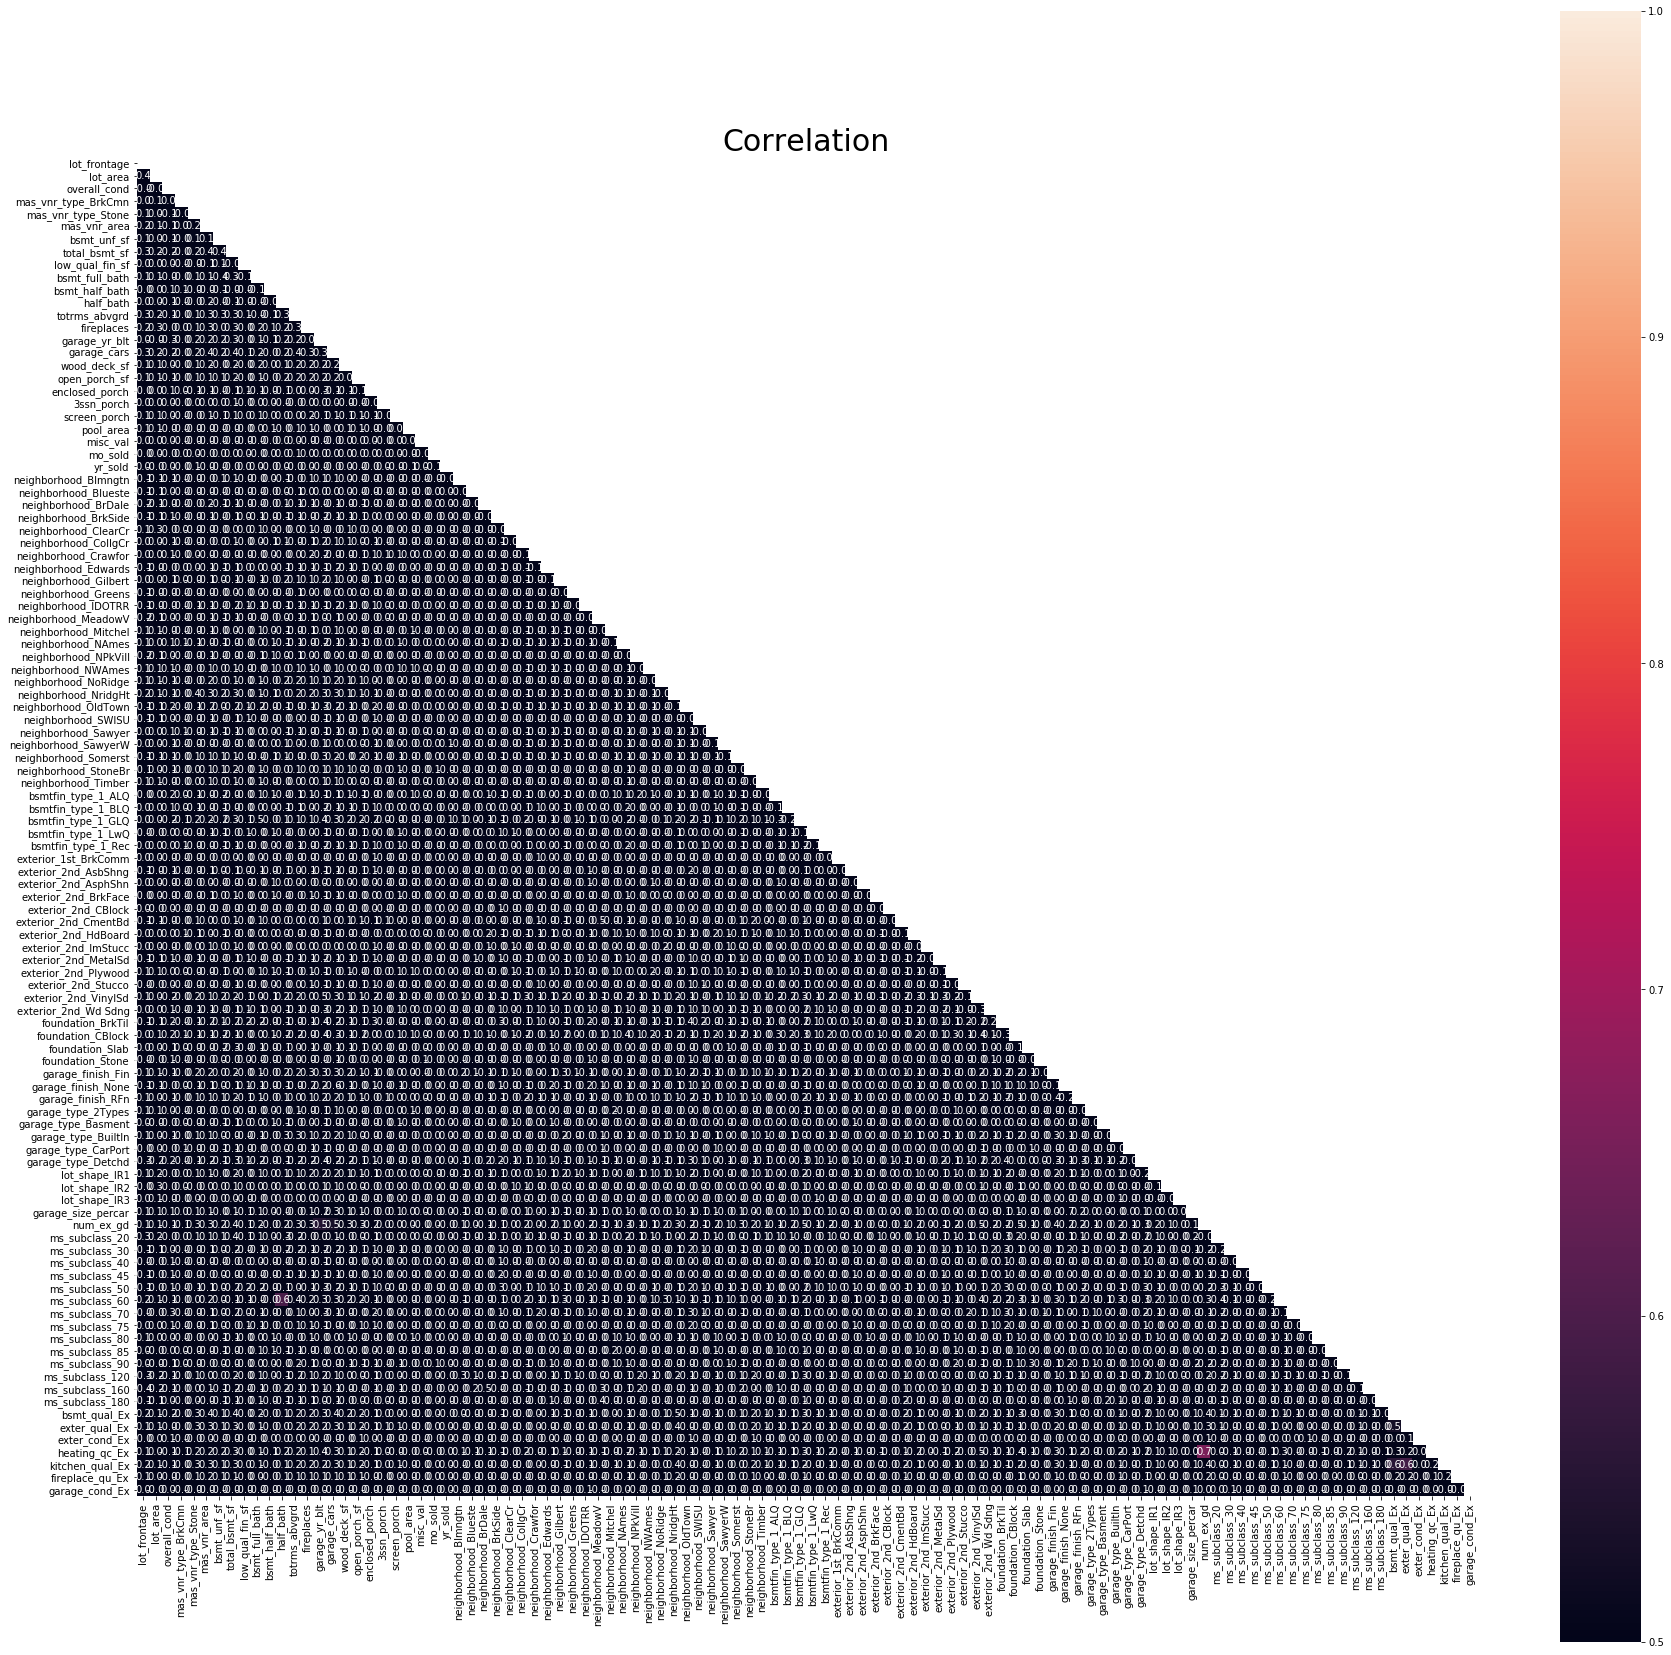

In [63]:
#Plot figsize
fig, ax = plt.subplots(figsize=(30,30))  
#Create Correlation 
corr = predictors_filtered.corr()
#Mask to drop redundant corr.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, mask=mask, square=True, annot=True, ax=ax,fmt=".1f",vmin=0.5, vmax=1.0)
ax.set_title('Correlation',fontsize = 30)

 <a id="Modelling"></a>

## Modeling 

### Linear Regression with all predictors (excluding predictors with extremely skewed data)

In [64]:
# FIRST MODEL - with all predictors
X = predictors_all
y = train["saleprice"]
X = X.astype('float64')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [65]:
scaler = StandardScaler()
scaler = scaler.fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
lm = linear_model.LinearRegression() 

model_train = lm.fit(Xs_train, y_train)

In [67]:
model_train.score(Xs_test, y_test)
print ("linear regression score with all predictors: {}".format(model_train.score(Xs_test, y_test)))

linear regression score with all predictors: 0.9186168321461955


### Lasso Regression with all predictors  (excluding predictors with extremely skewed data)

In [68]:
model_lasso=Lasso(alpha = 0.00001, random_state=1)
model_lasso.fit(Xs_train,y_train)
model_lasso.score(Xs_train, y_train)

print ("Lasso Model Score with all predictors: {}".format(model_lasso.score(Xs_test, y_test)))

Lasso Model Score with all predictors: 0.9185685117277702


C:\Users\Serene\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [69]:
from sklearn.metrics import mean_squared_error
from math import sqrt
y_predicted_all = model_lasso.predict(Xs_test)
rms = sqrt(mean_squared_error(y_test, y_predicted_all))
print ("Lasso Residual Mean Square with all predictors: {}".format(rms))

Lasso Residual Mean Square with all predictors: 23367.546982831504


### Ridge Regression with all predictors  (excluding predictors with extremely skewed data)

In [70]:
ridge_alphas = np.logspace(0, 5, 200)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=5)
optimal_ridge = optimal_ridge.fit(Xs_train, y_train)

ridge_optimal_alpha = optimal_ridge.alpha_
print(ridge_optimal_alpha)

76.63410868007459


In [71]:
ridge_all = Ridge(alpha=ridge_optimal_alpha)
ridge_all.fit(Xs_train, y_train)
ridge_all.score(Xs_test, y_test)
print ("Ridge Model Score with all predictors: {}".format(ridge_all.score(Xs_test, y_test)))

ridge_all_features = X.columns
coeff = list(zip(ridge_all.coef_, ridge_all_features))
coeff_all_ridge = pd.DataFrame(coeff)

coeff_csv = coeff_all_ridge.to_csv (r'..\coeff_all_ridge.csv', index = None, header=True)

Ridge Model Score with all predictors: 0.919680153913975


In [72]:
from sklearn.metrics import mean_squared_error
from math import sqrt
y_predicted_all = ridge_all.predict(Xs_test)
rms = sqrt(mean_squared_error(y_test, y_predicted_all))
print ("Ridge Residual Mean Square with all predictors: {}".format(rms))

Ridge Residual Mean Square with all predictors: 23207.500701285084


### Elastic Net with all predictors (excluding predictors with extremely skewed data)

In [73]:
enet_alphas = np.arange(0.5, 1.0, 0.005)
enet_ratio = 0.5
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)
enet_model = enet_model.fit(Xs_train, y_train)
print ("Elastic Net Model Score with all predictors: {}".format(enet_model.score(Xs_test,y_test)))

Elastic Net Model Score with all predictors: 0.9168663181100862


In [74]:
y_predicted_all = enet_model.predict(Xs_test)
rms = sqrt(mean_squared_error(y_test, y_predicted_all))
print ("Elastic Residual Mean Square with all predictors: {}".format(rms))

Elastic Residual Mean Square with all predictors: 23610.514236756928


In [75]:
predictors_all_test = test[['lot_frontage',
 'lot_area',
 'overall_qual',  # to remove - strongly correlate with multiple variables
 'overall_cond',
 'year_built', # to remove - strongly correlate with overall qual
 'year_remod/add', # to remove - strongly correlate with overall qual
 'mas_vnr_type_BrkCmn',
 'mas_vnr_type_BrkFace',
 'mas_vnr_type_Stone',
 'mas_vnr_area',
 'bsmtfin_sf_1',# to remove - strongly correlate with multiple variables
 'bsmtfin_sf_2', #to remove strongly correlate with bath
 ###'bsmt_unf_sf',
 'total_bsmt_sf', 
 '1st_flr_sf', # to remove- strongly correlate total bsmt square feet
 '2nd_flr_sf',# to remove- strongly correlate total bsmt square feet
 'low_qual_fin_sf',
 'gr_liv_area', # to remove- strongly correlate totalrm abv grade
 ###'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath', # to remove - strongly correlate with multiple variables
 'half_bath',
 'bedroom_abvgr', # to remove- strongly correlate totalrm abv grade
 'kitchen_abvgr',
 'totrms_abvgrd', 
 'fireplaces',
 'garage_yr_blt',
 'garage_cars', 
 'garage_area', # to remove- strongly correlate with garage car
 ###'wood_deck_sf',
 ###'open_porch_sf',
 'enclosed_porch',
 ##'3ssn_porch',
 'screen_porch',
 ###'pool_area',
 ###'misc_val',
 ###'mo_sold',
 'yr_sold','neighborhood_Blmngtn',
 ###'neighborhood_Blueste',
 ###'neighborhood_BrDale',
 ###'neighborhood_BrkSide',
 ###'neighborhood_ClearCr',
 'neighborhood_CollgCr',
 'neighborhood_Crawfor',
 'neighborhood_Edwards',
 'neighborhood_Gilbert',
 ###'neighborhood_Greens',
 #'neighborhood_GrnHill',
 'neighborhood_IDOTRR',
 #'neighborhood_Landmrk',
 'neighborhood_MeadowV',
 'neighborhood_Mitchel',
 'neighborhood_NAmes',
 ###'neighborhood_NPkVill',
 'neighborhood_NWAmes',
 'neighborhood_NoRidge',
 'neighborhood_NridgHt',
 'neighborhood_OldTown',
 'neighborhood_SWISU',
 'neighborhood_Sawyer',
 'neighborhood_SawyerW',
 'neighborhood_Somerst',
 'neighborhood_StoneBr',
 'neighborhood_Timber','bsmtfin_type_1_ALQ',
 'bsmtfin_type_1_BLQ',
 ###'bsmtfin_type_1_GLQ',
 'bsmtfin_type_1_LwQ',
 'bsmtfin_type_1_Rec',
 'exterior_1st_AsbShng',
 ###'exterior_1st_AsphShn',
 'exterior_1st_BrkComm',
 'exterior_1st_BrkFace',
 #'exterior_1st_CBlock',
 ###'exterior_1st_CemntBd',
 'exterior_1st_HdBoard',
 #'exterior_1st_ImStucc',
 ##'exterior_1st_MetalSd',
 ###'exterior_1st_Plywood',
 #'exterior_1st_Stone',
 ###'exterior_1st_Stucco',
 ###'exterior_1st_VinylSd',
 'exterior_1st_Wd Sdng',
 'exterior_2nd_AsbShng',
 ###'exterior_2nd_AsphShn',
##'exterior_2nd_Brk Cmn',
 'exterior_2nd_BrkFace',
# 'exterior_2nd_CBlock',
 ###'exterior_2nd_CmentBd',
 ###'exterior_2nd_HdBoard',
 'exterior_2nd_ImStucc',
 'exterior_2nd_MetalSd',
 'exterior_2nd_Plywood',
 #'exterior_2nd_Stone',
 ###'exterior_2nd_Stucco',
 ###'exterior_2nd_VinylSd',
 ###'exterior_2nd_Wd Sdng',
    'foundation_BrkTil',
 'foundation_CBlock',
 ###'foundation_PConc',
 'foundation_Slab',
 ###'foundation_Stone',
 'garage_finish_Fin',
 'garage_finish_None',
 'garage_finish_RFn',
 'garage_type_2Types',
## 'garage_type_Attchd',
 'garage_type_Basment',
 'garage_type_BuiltIn',
 'garage_type_CarPort',
 'garage_type_Detchd',
 'house_style_1.5Fin',
 'house_style_1.5Unf',
 'house_style_1Story',
 ###'house_style_2.5Fin',
 ###'house_style_2.5Unf',
 ##'house_style_2Story',
 'house_style_SFoyer',
 'lot_shape_IR1',
 ###'lot_shape_IR2',
 'lot_shape_IR3',
 ###'basement_bath',
 'total_bath',
 'garage_size_percar',
 'porch_sf',
 ###'rmsabovegrade',
 'num_excellent',
 'num_ex_gd',
 'ms_subclass_20',
 ###'ms_subclass_30',
 ##'ms_subclass_40',
 'ms_subclass_45',
 'ms_subclass_50',
 'ms_subclass_60',
 ###'ms_subclass_70',
 'ms_subclass_75',
 ###'ms_subclass_80',
 ###'ms_subclass_85',
 ###'ms_subclass_90',
 'ms_subclass_120',
# 'ms_subclass_150',
 'ms_subclass_160',
 'ms_subclass_180',
  "bsmt_qual_Ex",
  "exter_qual_Ex",
 "exter_cond_Ex",
"heating_qc_Ex",
"kitchen_qual_Ex",
##"fireplace_qu_Ex",
"garage_cond_Ex",
 ##"pool_qc_Ex"
]]

### Use ridge model (all predictors (excluding predictors with extremely skewed data) for Kaggle submission 

In [76]:
predictors_all_test = predictors_all_test.astype('float64')
predictors_all_test_T = scaler.transform(predictors_all_test)
test["predictions_all"] = ridge_all.predict(predictors_all_test_T)

### Linear Regression with selected predictors

In [77]:
# Second MODEL - with selected predictors
Xf = predictors_filtered
Xf = Xf.astype('float64')
Xf_train, Xf_test, y_train, y_test = train_test_split(Xf, y, test_size=0.30, random_state=42)

In [78]:
scaler = StandardScaler()
scaler = scaler.fit(Xf_train)
Xfs_train = scaler.transform(Xf_train)
Xfs_test = scaler.transform(Xf_test)

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
lm = linear_model.LinearRegression() 

modelf_train = lm.fit(Xfs_train, y_train)
print ("Linear regression score with selected predictors: {}".format(modelf_train.score(Xfs_test,y_test)))


Linear regression score with selected predictors: 0.8859733862256396


### Lasso Regression with selected predictors

In [80]:
modelf_lasso=Lasso(alpha = 0.00001, random_state=1)
modelf_lasso.fit(Xfs_train, y_train)
modelf_lasso.score(Xfs_train, y_train)

print ("Lasso Model Score with selected predictors: {}".format(modelf_lasso.score(Xfs_test, y_test)))

Lasso Model Score with selected predictors: 0.8859733859550957


C:\Users\Serene\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### Ridge Regression with selected predictors

In [81]:
ridge_alphas = np.logspace(0, 5, 200)
optimal_ridge_ = RidgeCV(alphas=ridge_alphas, cv=5)
optimal_ridge_ = optimal_ridge_.fit(Xfs_train, y_train)

ridge_optimal_alpha = optimal_ridge.alpha_
print(ridge_optimal_alpha)

76.63410868007459


In [82]:
ridge = Ridge(alpha=ridge_optimal_alpha)
ridge.fit(Xfs_train, y_train)
ridge.score(Xfs_test, y_test)
print ("Ridge Model Score with selected predictors: {}".format(ridge.score(Xfs_test, y_test)))

Ridge Model Score with selected predictors: 0.8851382159082444


In [83]:
from sklearn.metrics import mean_squared_error
from math import sqrt
y_predicted_filtered = ridge.predict(Xfs_test)
rms_filtered = sqrt(mean_squared_error(y_test, y_predicted_filtered))
print ("Ridge Residual Mean Square with selected predictors: {}".format(rms_filtered))

Ridge Residual Mean Square with selected predictors: 27752.666528751673


In [84]:
predictors_filtered_test = test[['lot_frontage','lot_area',
 # 'overall_qual',  # to remove - strongly correlate with multiple variables ###
 'overall_cond',
 #'year_built', # to remove - strongly correlate with overall qual  ###
 #'year_remod/add', # to remove - strongly correlate with overall qual  ###
 'mas_vnr_type_BrkCmn',
 #'mas_vnr_type_BrkFace', ######
 'mas_vnr_type_Stone',
 'mas_vnr_area',
 #'bsmtfin_sf_1',# to remove - strongly correlate with multiple variables   ###
 #'bsmtfin_sf_2', #to remove strongly correlate with bath  ###
 'bsmt_unf_sf',
 'total_bsmt_sf', 
 #'1st_flr_sf', # to remove- strongly correlate total bsmt square feet ####
 #'2nd_flr_sf',# to remove- strongly correlate total bsmt square feet ####
 'low_qual_fin_sf',
 #'gr_liv_area', # to remove- strongly correlate totalrm abv grade  ###
 'bsmt_full_bath',
 'bsmt_half_bath',
 #'full_bath', # to remove - strongly correlate with multiple variables ####
 'half_bath',
 #'bedroom_abvgr', # to remove- strongly correlate totalrm abv grade  ###
 ###'kitchen_abvgr',  ###
 'totrms_abvgrd', 
 'fireplaces',
 'garage_yr_blt',
 'garage_cars', 
 #'garage_area', # to remove- strongly correlate with garage car  ###
 'wood_deck_sf',
 'open_porch_sf',
 'enclosed_porch',
 '3ssn_porch',
 'screen_porch',
 'pool_area',
 'misc_val',
 'mo_sold',
 'yr_sold','neighborhood_Blmngtn',
 'neighborhood_Blueste',
 'neighborhood_BrDale',
 'neighborhood_BrkSide',
 'neighborhood_ClearCr',
 'neighborhood_CollgCr',
 'neighborhood_Crawfor',
 'neighborhood_Edwards',
 'neighborhood_Gilbert',
 'neighborhood_Greens',
 #'neighborhood_GrnHill',
 'neighborhood_IDOTRR',
 #'neighborhood_Landmrk',
 'neighborhood_MeadowV',
 'neighborhood_Mitchel',
 'neighborhood_NAmes',
 'neighborhood_NPkVill',
 'neighborhood_NWAmes',
 'neighborhood_NoRidge',
 'neighborhood_NridgHt',
 'neighborhood_OldTown',
 'neighborhood_SWISU',
 'neighborhood_Sawyer',
 'neighborhood_SawyerW',
 'neighborhood_Somerst',
 'neighborhood_StoneBr',
 'neighborhood_Timber','bsmtfin_type_1_ALQ',
 'bsmtfin_type_1_BLQ',
 'bsmtfin_type_1_GLQ',
 'bsmtfin_type_1_LwQ',
 'bsmtfin_type_1_Rec',
 #'exterior_1st_AsbShng',
 #'exterior_1st_AsphShn',
 'exterior_1st_BrkComm',
 #'exterior_1st_BrkFace',
 #'exterior_1st_CBlock',
 #'exterior_1st_CemntBd',
 #'exterior_1st_HdBoard',
 #'exterior_1st_ImStucc',
 #'exterior_1st_MetalSd',
 #'exterior_1st_Plywood',
 #'exterior_1st_Stone',
 #'exterior_1st_Stucco',
 #'exterior_1st_VinylSd',
 #'exterior_1st_Wd Sdng',
 'exterior_2nd_AsbShng',
 'exterior_2nd_AsphShn',
 #'exterior_2nd_Brk Cmn',
 'exterior_2nd_BrkFace',
 'exterior_2nd_CBlock',
 'exterior_2nd_CmentBd',
 'exterior_2nd_HdBoard',
 'exterior_2nd_ImStucc',
 'exterior_2nd_MetalSd',
 'exterior_2nd_Plywood',
 #'exterior_2nd_Stone',
 'exterior_2nd_Stucco',
 'exterior_2nd_VinylSd',
 'exterior_2nd_Wd Sdng','foundation_BrkTil',
 'foundation_CBlock',
 #'foundation_PConc',
 'foundation_Slab',
 'foundation_Stone',
 'garage_finish_Fin',
 'garage_finish_None',
 'garage_finish_RFn',
 'garage_type_2Types',
 #'garage_type_Attchd', 
 'garage_type_Basment',
 'garage_type_BuiltIn',
 'garage_type_CarPort',
 'garage_type_Detchd',
 #'house_style_1.5Fin', 
 #'house_style_1.5Unf', 
 #'house_style_1Story', 
 #'house_style_2.5Fin', 
 #'house_style_2.5Unf',
 #'house_style_2Story',
 #'house_style_SFoyer',
 'lot_shape_IR1',
 'lot_shape_IR2',
 'lot_shape_IR3',
 #'basement_bath',
 #'total_bath',  
 'garage_size_percar',
 #'porch_sf',  
 #'rmsabovegrade', 
 #'num_excellent', 
 'num_ex_gd',
 'ms_subclass_20',
 'ms_subclass_30',
 'ms_subclass_40',
 'ms_subclass_45',
 'ms_subclass_50',
 'ms_subclass_60',
 'ms_subclass_70',
 'ms_subclass_75',
 'ms_subclass_80',
 'ms_subclass_85',
 'ms_subclass_90',
 'ms_subclass_120',
# 'ms_subclass_150', 
 'ms_subclass_160',
 'ms_subclass_180',"bsmt_qual_Ex","exter_qual_Ex","exter_cond_Ex","heating_qc_Ex","kitchen_qual_Ex","fireplace_qu_Ex","garage_cond_Ex"]]

### Use predicted data using ridge model (filtered variables)

In [85]:
predictors_filtered_test = predictors_filtered_test.astype("float64")
predictors_filtered_test_T = scaler.transform(predictors_filtered_test)
test["predictions_filtered"] = ridge.predict(predictors_filtered_test_T)

In [86]:
test.to_csv(r'./Prediction_10.csv')

 <a id="Conclusions-and-Recommendations"></a>

## Model Scores

In [87]:
print ("linear regression score with all predictors: {}".format(model_train.score(Xs_test, y_test)))
print ("Lasso Model Score with all predictors: {}".format(model_lasso.score(Xs_test, y_test)))
print ("Ridge Model Score with all predictors: {}".format(ridge_all.score(Xs_test, y_test)))
print ("Elastic Net Model Score with all predictors: {}".format(enet_model.score(Xs_test,y_test)))

print ("Linear regression score with selected predictors: {}".format(modelf_train.score(Xfs_test,y_test)))
print ("Lasso Model Score with selected predictors: {}".format(modelf_lasso.score(Xfs_test, y_test)))
print ("Ridge Model Score with selected predictors: {}".format(ridge.score(Xfs_test, y_test)))

linear regression score with all predictors: 0.9186168321461955
Lasso Model Score with all predictors: 0.9185685117277702
Ridge Model Score with all predictors: 0.919680153913975
Elastic Net Model Score with all predictors: 0.9168663181100862
Linear regression score with selected predictors: 0.8859733862256396
Lasso Model Score with selected predictors: 0.8859733859550957
Ridge Model Score with selected predictors: 0.8851382159082444
